In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Mall.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.drop(['CustomerID'],axis=1,inplace=True)

In [5]:
data_new=pd.get_dummies(data,drop_first=True)

In [6]:
data_new.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Male               0
dtype: int64

In [7]:
data_new.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [8]:
data_new.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male'], dtype='object')

# Plotting with respect to Age

<AxesSubplot:xlabel='Age', ylabel='Gender_Male'>

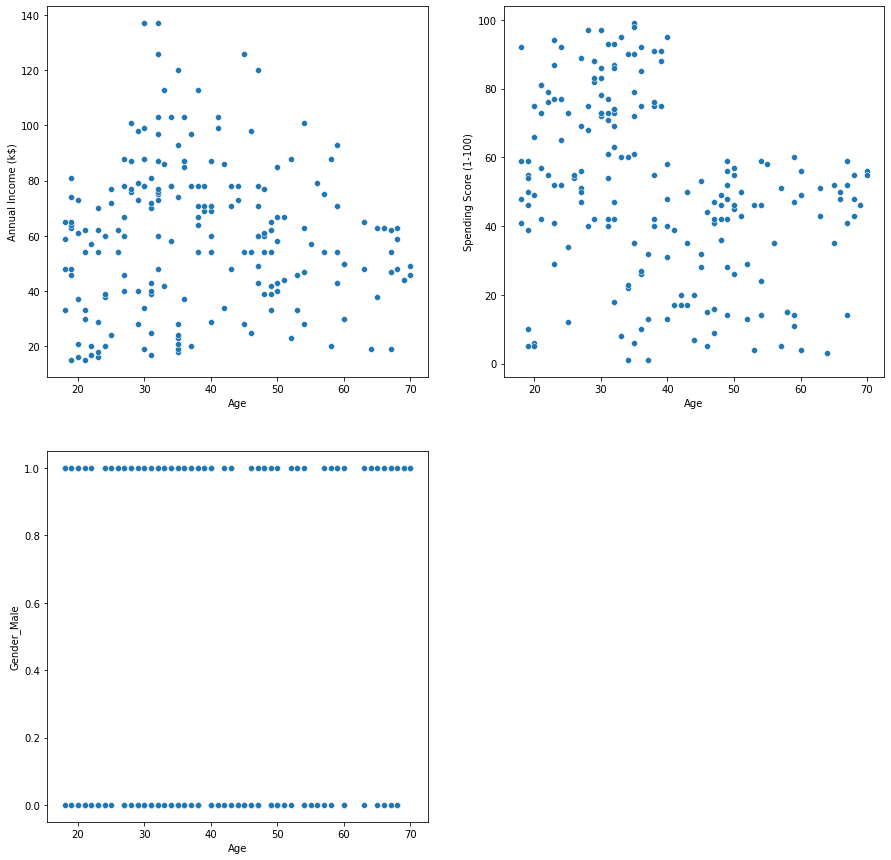

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.scatterplot(x=data_new.Age,y=data_new['Annual Income (k$)'])
plt.subplot(2,2,2)
sns.scatterplot(x=data_new.Age,y=data_new['Spending Score (1-100)'])
plt.subplot(2,2,3)
sns.scatterplot(x=data_new.Age,y=data_new['Gender_Male'])

# Plotting with respect to Annual Income 

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Gender_Male'>

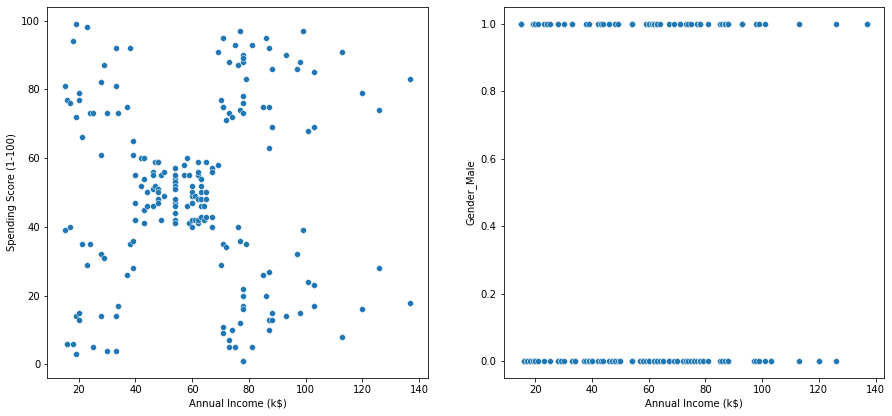

In [10]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.scatterplot(x=data_new['Annual Income (k$)'],y=data_new['Spending Score (1-100)'])
plt.subplot(2,2,2)
sns.scatterplot(x=data_new['Annual Income (k$)'],y=data_new['Gender_Male'])

# Plotting with respect to Spending Score

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Gender_Male'>

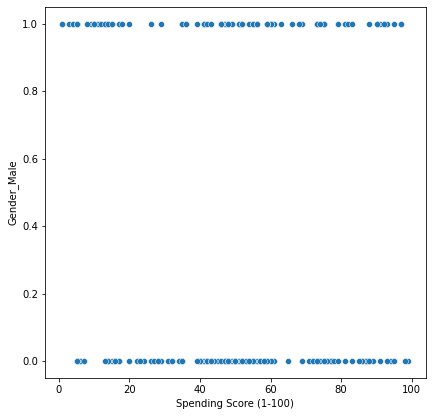

In [11]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.scatterplot(x=data_new['Spending Score (1-100)'],y=data_new['Gender_Male'])

In [12]:
x=data_new[['Annual Income (k$)','Spending Score (1-100)']]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(x[['Annual Income (k$)']])
x['Annual Income (k$)']=scaler.transform(x[['Annual Income (k$)']])

scaler.fit(x[['Spending Score (1-100)']])
x['Spending Score (1-100)']=scaler.transform(x[['Spending Score (1-100)']])

<ipython-input-13-a974f256d904>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Annual Income (k$)']=scaler.transform(x[['Annual Income (k$)']])
<ipython-input-13-a974f256d904>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Spending Score (1-100)']=scaler.transform(x[['Spending Score (1-100)']])


In [14]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


# Elbow Method

In [15]:
from sklearn.cluster import KMeans

In [16]:
# k_range=(1,3)
# wcss=[]

In [19]:
distortions = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(x[['Annual Income (k$)','Spending Score (1-100)']])
    distortions.append(km.inertia_)

In [20]:
distortions

[23.040720326039906,
 13.993505283127979,
 9.058985215159455,
 6.110312266413655,
 3.583117905952559,
 3.1084249143351603,
 2.6252512977286337,
 2.2168818321158836,
 1.873875095904132]

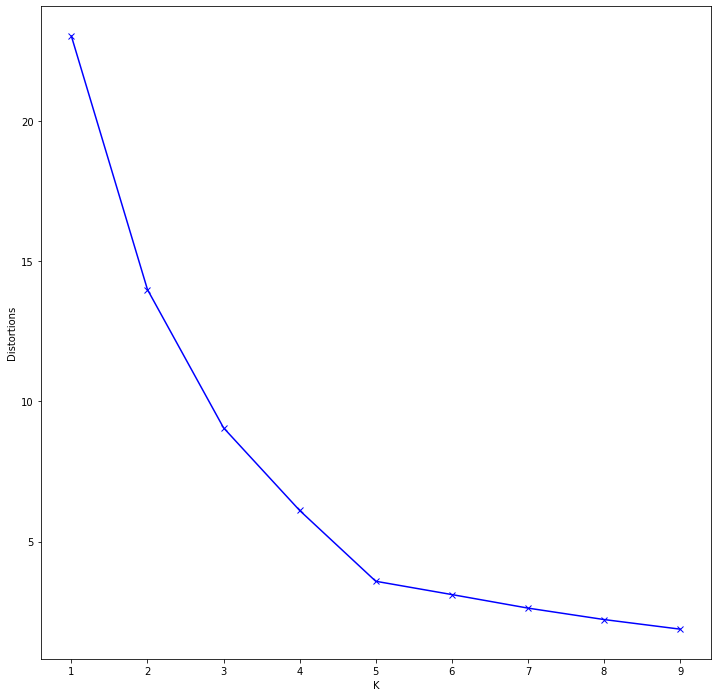

In [26]:
plt.figure(figsize=(12,12))
plt.xlabel('K')
plt.ylabel('Distortions')
plt.plot(K,distortions,'bx-')

In [27]:
kmeans=KMeans(n_clusters=5)
x['predicted']=kmeans.fit_predict(x)

<ipython-input-27-a5fa3c9f1909>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['predicted']=kmeans.fit_predict(x)


In [28]:
x.head()

,Annual Income (k$),Spending Score (1-100),predicted
0,0.000000,0.387755,1
1,0.000000,0.816327,4
2,0.008197,0.051020,1
3,0.008197,0.775510,4
4,0.016393,0.397959,1


In [29]:
kmeans.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894]])

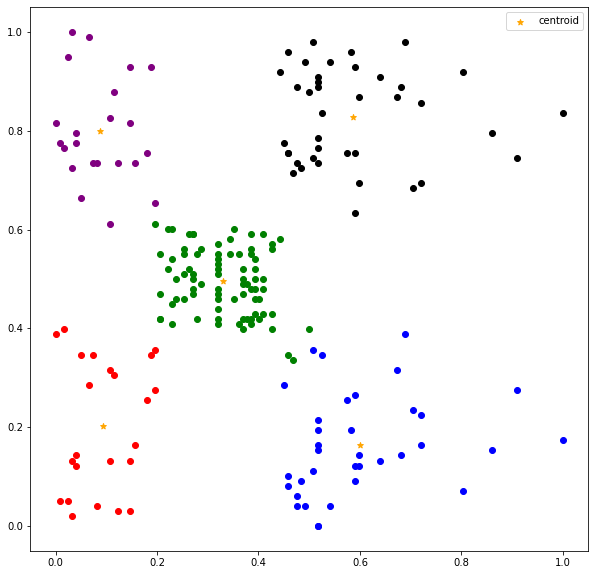

In [30]:
plt.figure(figsize=(10,10))
df1 = x[x.predicted==0]
df2 = x[x.predicted==1]
df3 = x[x.predicted==2]
df4 = x[x.predicted==3]
df5 = x[x.predicted==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='blue')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='purple')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='orange',marker='*',label='centroid')
plt.legend()